# Preprocessing Chronic kidney disease dataset in CSV format

## 1. Import and add data path

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRFClassifier


In [98]:
input_csv = "../dataset/chronic_kidney_disease_full.csv"


## 2. Exploratory Data Analysis - EDA

In [99]:
# Read dataset
data = pd.read_csv(input_csv)
data.shape

(400, 26)

In [100]:
# Get columns of dataset
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [101]:
# Get shape of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  rbcc    269 non-null    float64
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [102]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [103]:
data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [104]:
data.isna().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [105]:
data.dtypes

id         int64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

## 3. Data Preprocessing and Splitting

### 3.1. Split X, y, X to numerical and categorial

In [106]:
target_col = "class"

X = data.drop(columns=[target_col, "id"])
y = data[target_col]

X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [107]:
categorial_cols = X.select_dtypes(include="object").columns.tolist()
categorial_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [108]:
numerical_cols = X.select_dtypes(exclude="object").columns.tolist()
numerical_cols

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc']

### 3.2. Fill null value and one-hot encoding for categorial data

In [109]:
# Fill null for categorial data with KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

X_numerical = pd.DataFrame(
    knn_imputer.fit_transform(X[numerical_cols]),
    columns=numerical_cols,
    index=X.index,
)

print(X_numerical.isna().sum())
X_numerical.columns

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wbcc    0
rbcc    0
dtype: int64


Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc'],
      dtype='object')

In [110]:
# Fill null for categorial data with most frequen imputer
frequent_imputer = SimpleImputer(strategy="most_frequent")
X_categorial = pd.DataFrame(
    frequent_imputer.fit_transform(X[categorial_cols]),
    columns=categorial_cols,
    index=X.index,
)

# Using onehot-encoding for categorial data
X_categorial = pd.get_dummies(X_categorial, drop_first=True)
y = y.replace({"notckd": 0, "ckd": 1})

print(X_categorial.isna().sum())
X_categorial.columns

rbc_normal     0
pc_normal      0
pcc_present    0
ba_present     0
htn_yes        0
dm_yes         0
cad_yes        0
appet_poor     0
pe_yes         0
ane_yes        0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16076\2469022991.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({"notckd": 0, "ckd": 1})


Index(['rbc_normal', 'pc_normal', 'pcc_present', 'ba_present', 'htn_yes',
       'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

In [111]:
X_processed = pd.concat([X_numerical, X_categorial], axis=1)
X_processed

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,...,True,True,False,False,True,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,113.0,18.0,0.8,137.4,4.00,...,True,True,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.8,4.20,...,True,True,False,False,False,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,...,True,False,True,False,True,False,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,...,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.90,...,True,True,False,False,False,False,False,False,False,False
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.50,...,True,True,False,False,False,False,False,False,False,False
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.40,...,True,True,False,False,False,False,False,False,False,False
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.90,...,True,True,False,False,False,False,False,False,False,False


### 3.3. Split data for train and test

In [112]:
X_processed.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wbcc', 'rbcc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes'],
      dtype='object')

In [113]:
X_train_preprocess, X_test_preprocess, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train_preprocess.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,True,False,True,False,True,False,False,True,True,True
18,60.0,100.0,1.025,0.0,3.0,263.0,27.0,1.3,135.0,4.3,...,True,True,False,False,True,True,True,False,False,False
202,78.0,60.0,1.020,1.0,0.0,114.0,74.0,2.9,135.0,5.9,...,True,True,False,False,False,True,False,False,False,True
250,40.0,80.0,1.025,0.0,0.0,140.0,10.0,1.2,135.0,5.0,...,True,True,False,False,False,False,False,False,False,False
274,19.0,80.0,1.020,0.0,0.0,107.0,23.0,0.7,141.0,4.2,...,True,True,False,False,False,False,False,False,False,False


### 3.4. Scale numerical data

In [114]:
scaler = StandardScaler()

X_train_preprocess[numerical_cols] = scaler.fit_transform(X_train_preprocess[numerical_cols])
X_test_preprocess[numerical_cols] = scaler.transform(X_test_preprocess[numerical_cols])

### 3.4. Feature selection

In [115]:
# Implement RFE
rfe = RFE(
    estimator=DecisionTreeClassifier(
        random_state=42,
        max_depth=5,
    ),
    n_features_to_select=14
)

X_rfe = rfe.fit_transform(X_train_preprocess, y_train)
rfe.support_

array([False, False,  True,  True, False, False, False,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True])

In [116]:
# Selected features
selected_features = X_train_preprocess.columns[rfe.support_]

# Final data for train and test
X_train = X_train_preprocess[selected_features]
X_test = X_test_preprocess[selected_features]

X_train

,sg,al,sc,sod,hemo,wbcc,rbcc,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
3,-2.209776,2.336366,0.177610,-2.685788,-0.537188,-0.673384,-0.935159,False,True,False,False,True,True,True
18,1.405399,-0.815561,-0.283670,-0.249555,0.017519,1.113437,-0.478043,False,True,True,True,False,False,False
202,0.501606,-0.027579,0.011549,-0.249555,-1.720563,0.512761,-0.363764,False,False,True,False,False,False,True
250,1.405399,-0.815561,-0.302121,-0.249555,0.868070,0.733262,-0.249485,False,False,False,False,False,False,False
274,0.501606,-0.815561,-0.394377,0.359503,0.646188,-0.308417,0.413333,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.305982,-0.027579,0.085354,0.359503,-1.054914,2.329996,-1.735111,False,True,True,False,False,False,False
106,-0.582947,0.445210,0.601987,-1.061633,-2.460172,-0.749419,0.001928,False,True,True,False,False,True,True
270,1.405399,-0.815561,-0.320572,0.765542,0.609207,-0.483297,0.321909,False,False,False,False,False,False,False
348,0.501606,-0.815561,-0.431279,0.968561,0.350344,-0.445280,1.921814,False,False,False,False,False,False,False


In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320 entries, 3 to 102
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sg          320 non-null    float64
 1   al          320 non-null    float64
 2   sc          320 non-null    float64
 3   sod         320 non-null    float64
 4   hemo        320 non-null    float64
 5   wbcc        320 non-null    float64
 6   rbcc        320 non-null    float64
 7   ba_present  320 non-null    bool   
 8   htn_yes     320 non-null    bool   
 9   dm_yes      320 non-null    bool   
 10  cad_yes     320 non-null    bool   
 11  appet_poor  320 non-null    bool   
 12  pe_yes      320 non-null    bool   
 13  ane_yes     320 non-null    bool   
dtypes: bool(7), float64(7)
memory usage: 22.2 KB


In [118]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 209 to 289
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sg          80 non-null     float64
 1   al          80 non-null     float64
 2   sc          80 non-null     float64
 3   sod         80 non-null     float64
 4   hemo        80 non-null     float64
 5   wbcc        80 non-null     float64
 6   rbcc        80 non-null     float64
 7   ba_present  80 non-null     bool   
 8   htn_yes     80 non-null     bool   
 9   dm_yes      80 non-null     bool   
 10  cad_yes     80 non-null     bool   
 11  appet_poor  80 non-null     bool   
 12  pe_yes      80 non-null     bool   
 13  ane_yes     80 non-null     bool   
dtypes: bool(7), float64(7)
memory usage: 5.5 KB


## 4. Training

In [119]:
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000
    ),
    "SVM": SVC(
        probability=True
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5,
    ),
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=5,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
    ),
}


-------------------- Logistic Regression --------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

AUC: 0.9643

-------------------- SVM --------------------
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.96      0.98      0.97        52

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

AUC: 0.9643

-------------------- KNN --------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

  

C:\Users\Lenovo\miniconda3\envs\base_python_3.10\lib\site-packages\xgboost\training.py:199: UserWarning: [21:20:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


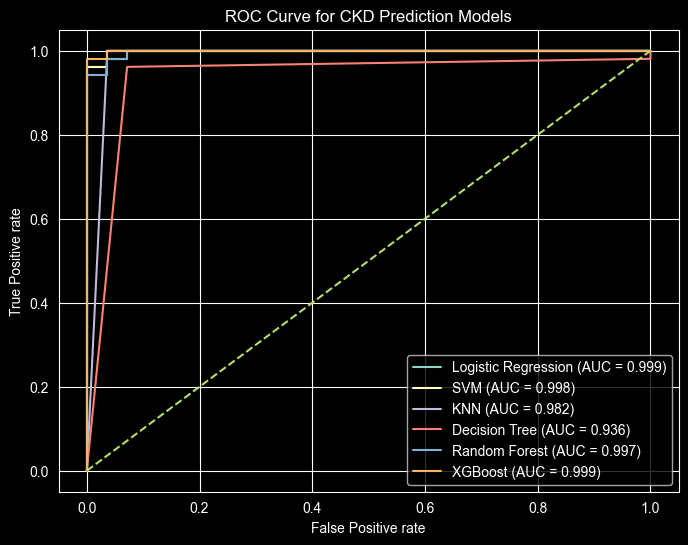

In [120]:
plt.figure(figsize=(8, 6))

for name, model in models.items():

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

    print("-"*20, name, "-"*20)
    print(classification_report(y_test, y_pred))
    print(f"AUC: {auc:.4f}\n")

plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC Curve for CKD Prediction Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()